# Import

In [7]:
import pandas as pd
import numpy as np
import warnings
from zlib import crc32
import hashlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [6]:


with warnings.catch_warnings():
    # You should probably not use this dataset.
    warnings.filterwarnings("ignore")
    boston = load_boston()
    X = boston.data
    y = boston.target
df = pd.DataFrame(X)
df.columns= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','MEDV'] 
print(X.shape, y.shape)

NameError: name 'load_boston' is not defined

## Acronyms and their meanings: 
CRIM:     per capita crime rate by town \
ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.\
INDUS:    proportion of non-retail business acres per town \
CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) \
NOX:      nitric oxides concentration (parts per 10 million) \
RM:       average number of rooms per dwelling \
AGE:      proportion of owner-occupied units built prior to 1940 \
DIS:      weighted distances to five Boston employment centres \
RAD:      index of accessibility to radial highways \
TAX:      full-value property-tax rate per $10,000 \
PTRATIO:  pupil-teacher ratio by town \
LSTAT:    percentage lower status of the population \
MEDV:     Median value of owner-occupied homes in $1000's

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
# To make output standard or same after every run
np.random.seed(42)

In [ ]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(df, 0.2)
print(len(train_set), "train +", len(test_set), "test")

405 train + 101 test


In [ ]:
df.head()
prices = df['MEDV']

# Statistics For Boston Housing Dataset

In [ ]:
# Minimum price
min_price = np.amin(prices)

# Maximum price
max_price = np.amax(prices)

# Mean price
mean_price = np.mean(prices)

# Median price
median_price = np.median(prices)

# Standard deviation of prices
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print(f"Minimum price: {min_price}")
print(f"Maximum price: ${max_price}")
print(f"Mean price: ${mean_price}")
print(f"Median price ${median_price}")
print(f"Standard deviation of prices: ${std_price}")

Statistics for Boston housing dataset:

Minimum price: 1.73
Maximum price: $37.97
Mean price: $12.653063241106722
Median price $11.36
Standard deviation of prices: $7.134001636650485


In [ ]:


def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:


def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [ ]:
housing_with_id = df.reset_index() 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [ ]:
housing_with_id["id"] = df["ZN"] * 1000 + df["INDUS"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [ ]:


train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


# Data Analysis: Scatterplot and Histograms

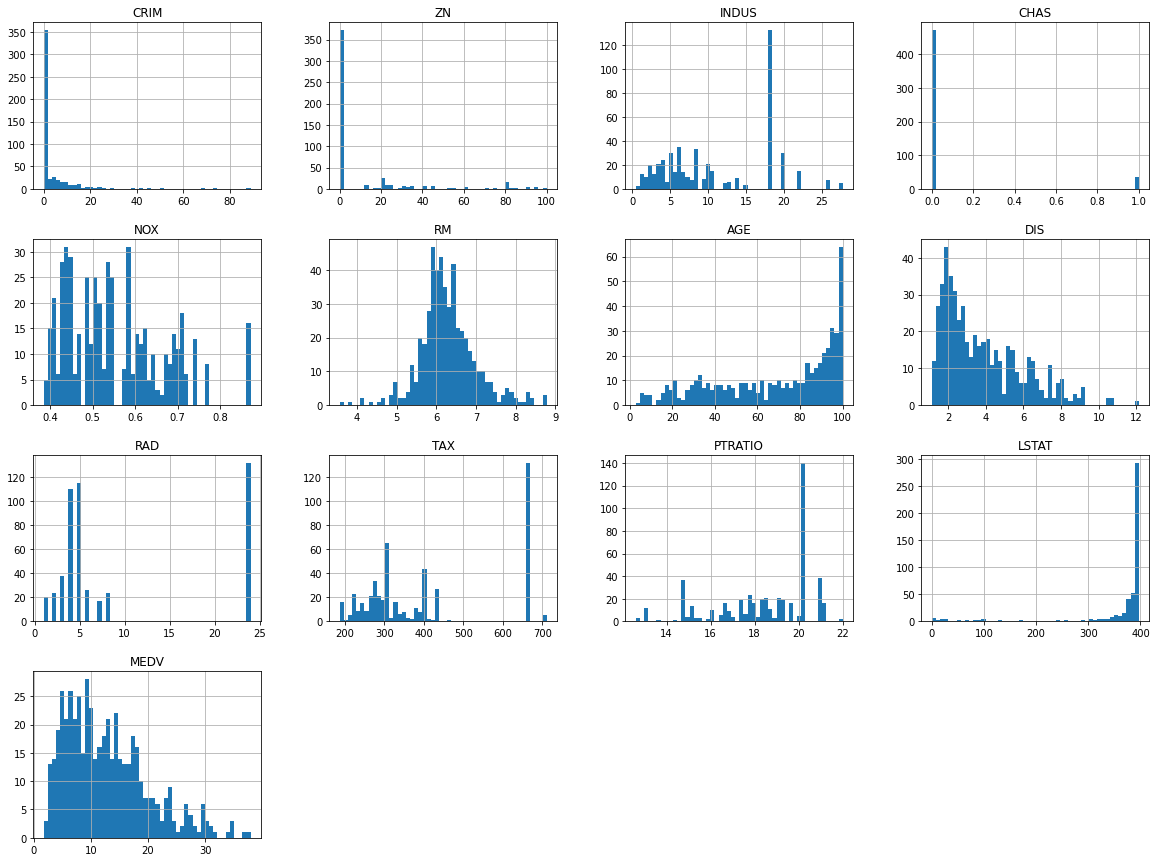

In [ ]:

df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

/Users/sravanthi/miniforge3/envs/ml/lib/python3.10/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


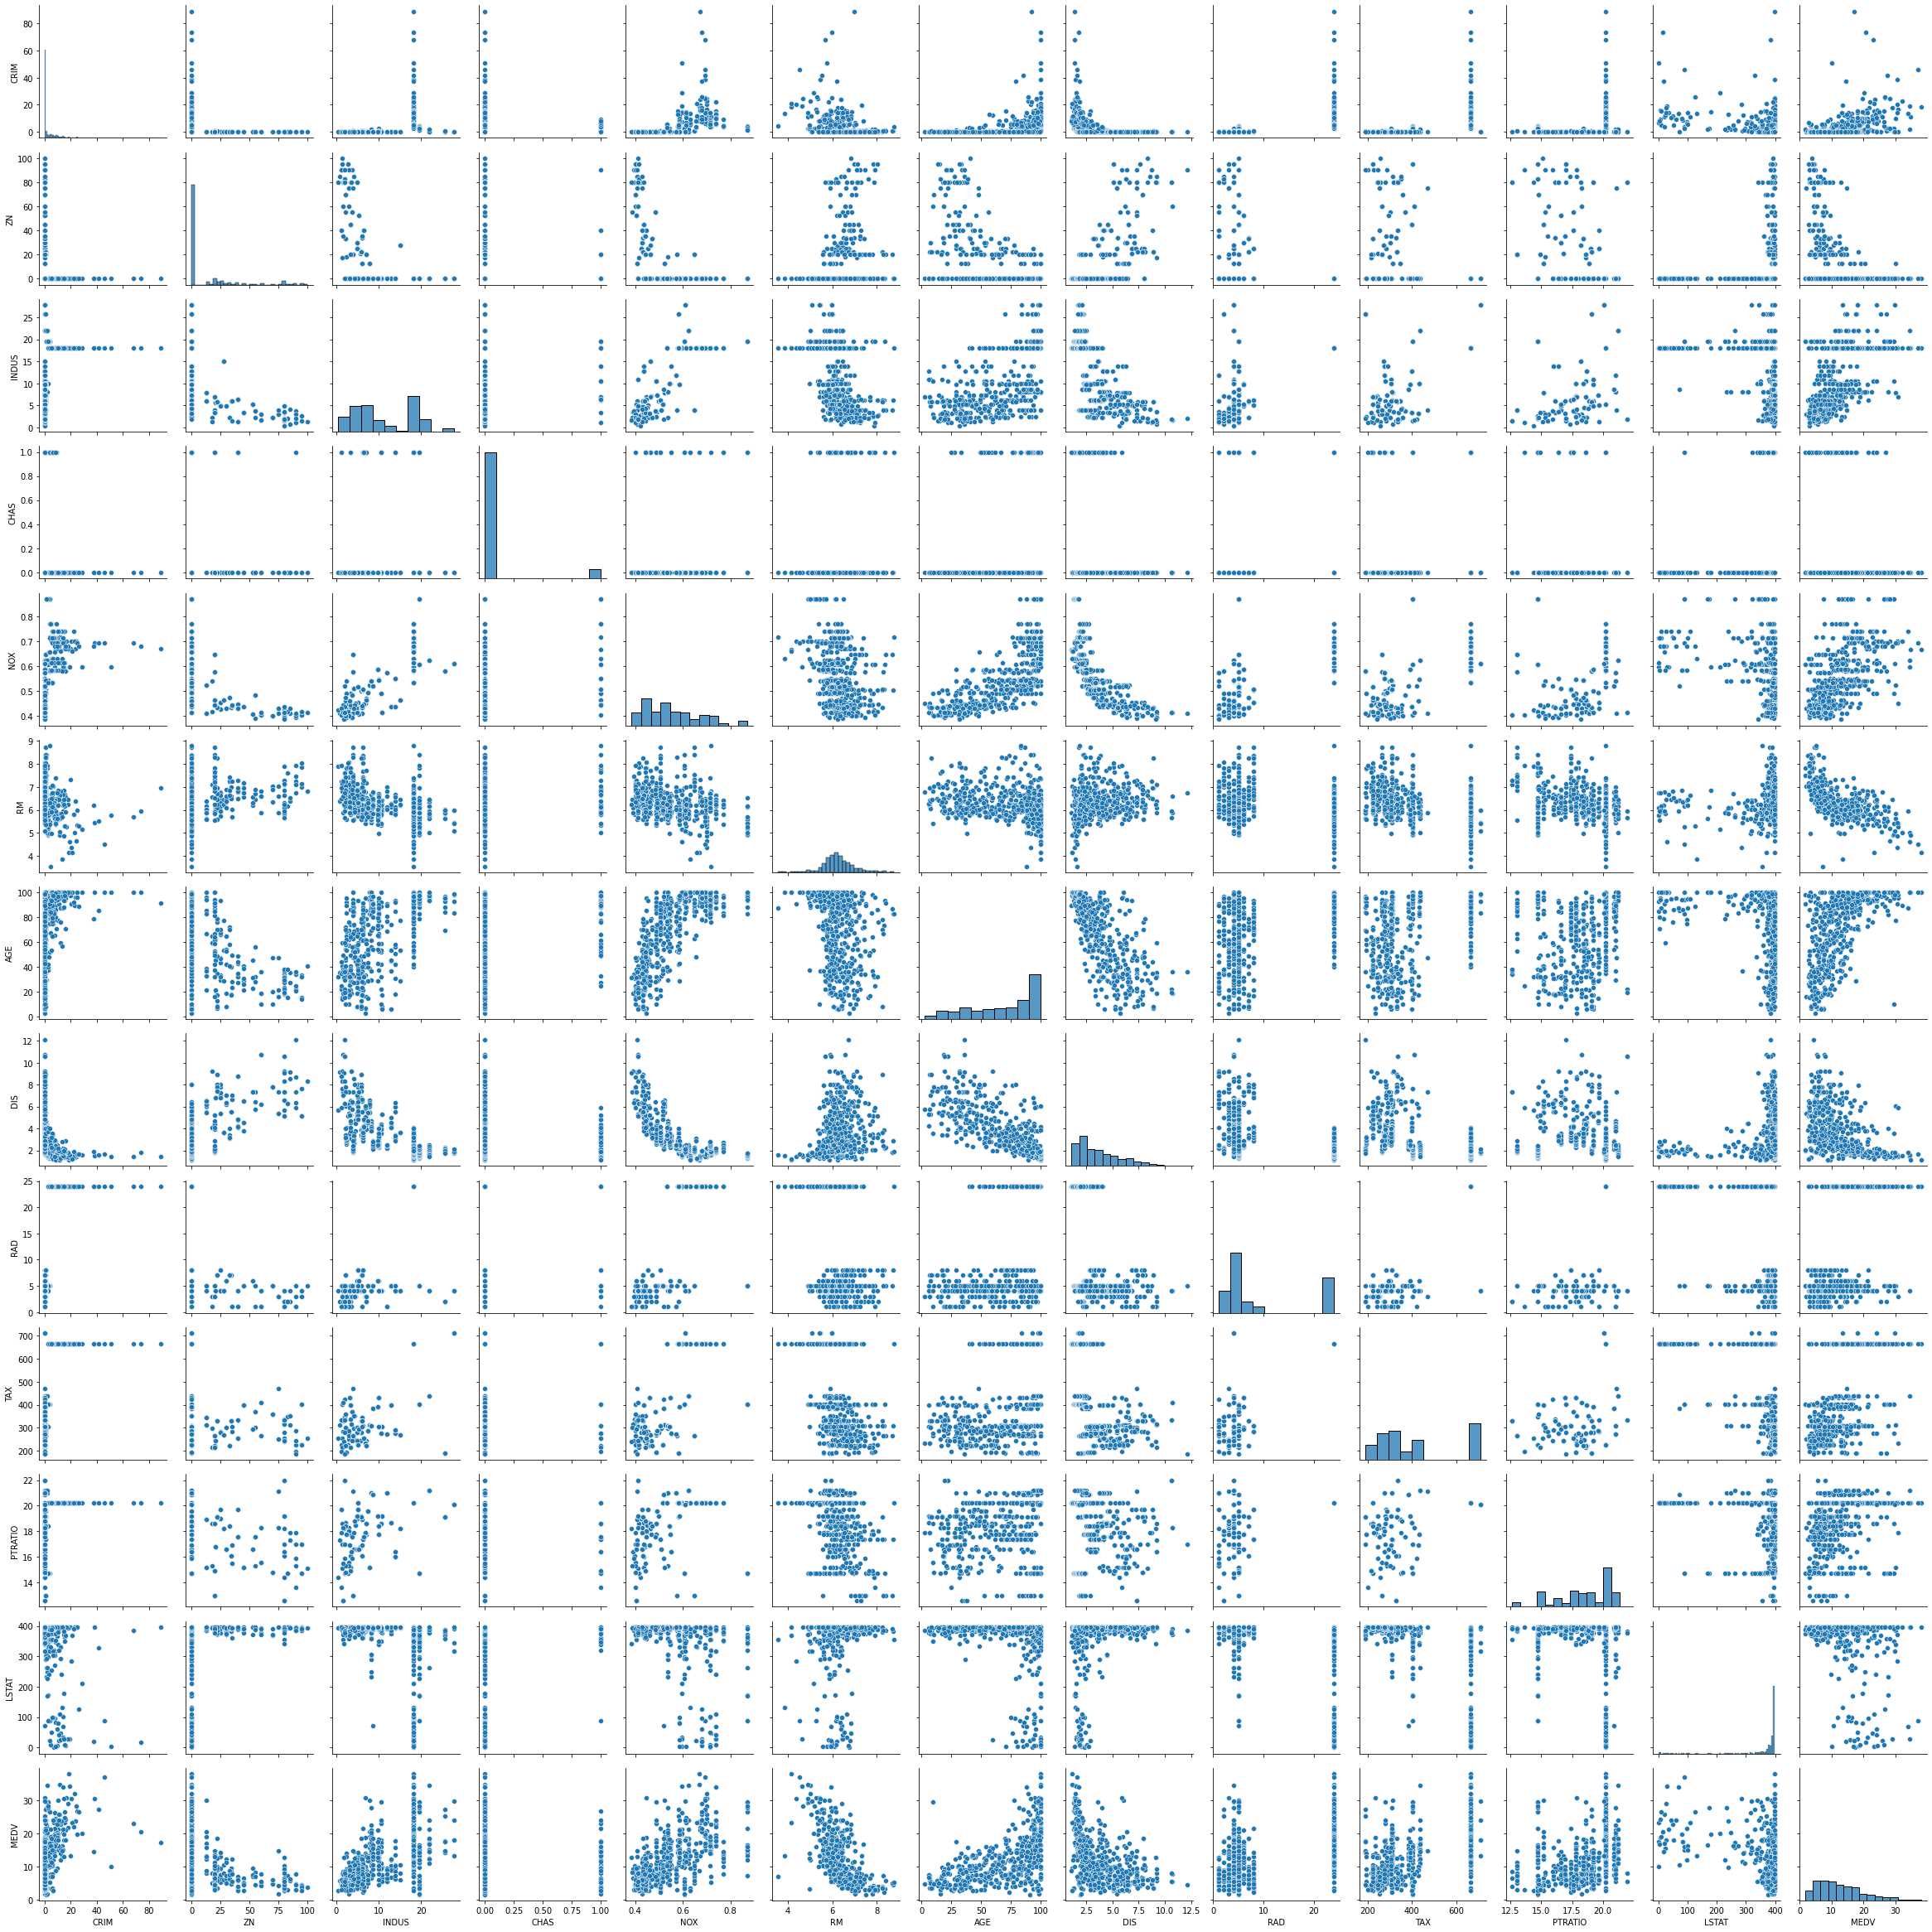

In [ ]:

# Calculate and plot pairplot
sns.pairplot(df, size=2.5)
plt.tight_layout()

# Correlation Matrix: to Quantify and Summarize Relationship Between Features

<AxesSubplot:>

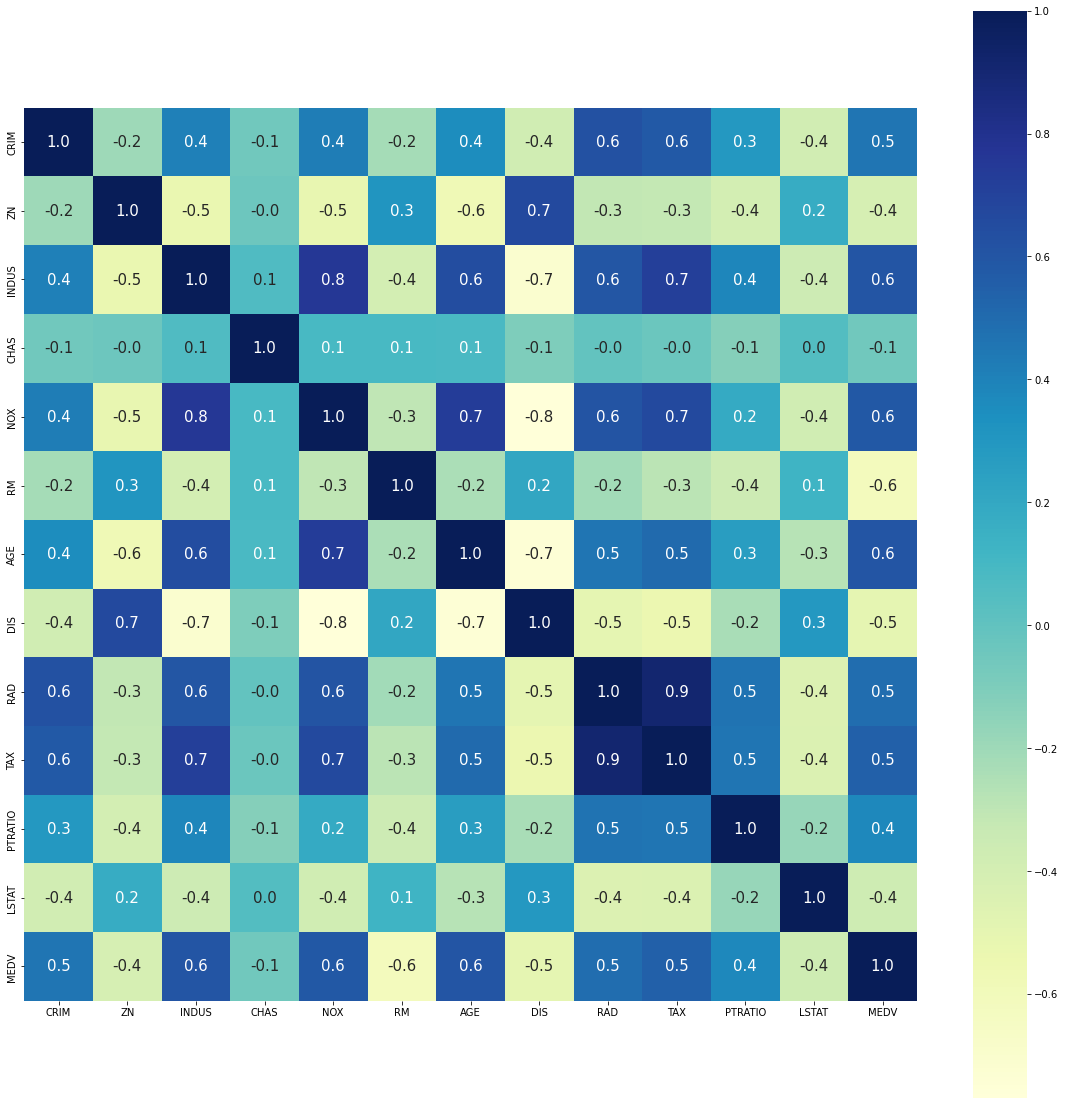

In [ ]:
# Plotting correlation between features
corr = df.corr()
corr.shape
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu')

In [ ]:
#Adding target variable to dataframe
df['price'] =  y
# Spliting target variable and independent variables
X = df.drop(['price'], axis = 1)
y = df['price']

# Linear Regression: Training The Model

In [ ]:

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    return score

In [ ]:

# Splitting to training and testing data


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [ ]:
# Import library for Linear Regression

regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,regressor_linear.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.055678
2,INDUS,-0.008834
3,CHAS,4.693448
4,NOX,-14.435783
5,RM,3.28008
6,AGE,-0.003448
7,DIS,-1.552144
8,RAD,0.32625
9,TAX,-0.014067


# Model Evaluation

In [ ]:
# Predicting Test data with the model
y_pred = regressor_linear.predict(X_train)

In [ ]:
# Model prediction on train data
y_pred = regressor_linear.predict(X_train)

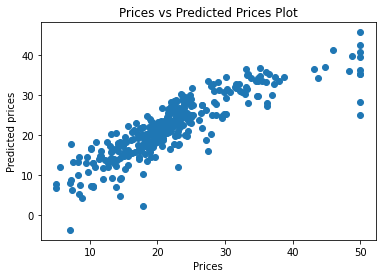

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted Prices Plot")
plt.show()

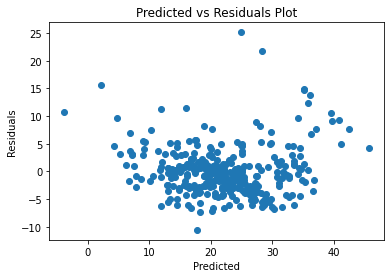

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs Residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/Users/sravanthi/miniforge3/envs/ml/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


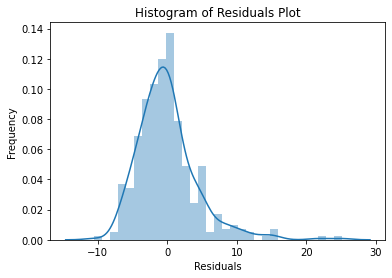

In [ ]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals Plot")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Applying on Test Data


# Linear Regression

In [ ]:
# Model Evaluation


# 𝑅^2 :It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.
# Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.
# MAE :It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. #
# MSE:The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 
# RMSE:The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

print('R2_Score(train):',r2_score(y_train, y_pred))
print('Adjusted R2_Score(test):',1 - (1-r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train, y_pred))
print('MSE:',mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred)))

R2_Score(train): 0.7465991966746854
Adjusted R2_Score(test): 0.736910342429894
MAE: 3.089861094971132
MSE: 19.073688703469035
RMSE: 4.367343437774162


In [ ]:
# Predicting Test data with the model
y_test_pred = regressor_linear.predict(X_test)


# Model Evaluation

# Finding Cross Validation Score - Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Finding R2 Score - Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Finding R2 Score - Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Finding RMSE - Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("Cross Validation: ", cv_linear.mean())
print('R2_Score (train): ', r2_score_linear_train)
print('R2_Score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

Cross Validation:  0.7105195798885202
R2_Score (train):  0.7465991966746854
R2_Score (test):  0.7121818377409184
RMSE:  5.482152251362986


# Polynomial Regression - 2nd degree

In [ ]:

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [ ]:


# Finding Cross Validation Score - Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Finding R2 Score - Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Finding R2 Score - Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Finding RMSE - Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('Cross Validation: ', cv_poly2.mean())
print('R2_Score (train): ', r2_score_poly2_train)
print('R2_Score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)


Cross Validation:  0.7105195798885202
R2_Score (train):  0.9280564047275943
R2_Score (test):  0.8581336375629273
RMSE:  3.8488564301676815


# Ridge Regression

In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

In [ ]:

# Finding Cross Validation Score - Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Finding R2 Score - Train set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Finding R2 Score - Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Finding RMSE - Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('Cross Validation: ', cv_ridge.mean())
print('R2_Score (train): ', r2_score_ridge_train)
print('R2_Score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

Cross Validation:  0.7996903927686639
R2_Score (train):  0.9201612573786374
R2_Score (test):  0.8741094437109738
RMSE:  3.6256724875949806


# Decision Tree Regression

In [ ]:
# Fitting the Decision Tree Regression Model to the dataset

regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:

# Finding Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Finding R2 Score - Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Finding R2 Score - Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Finding RMSE - Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('Cross Validation: ', cv_dt.mean())
print('R2_Score (train): ', r2_score_dt_train)
print('R2_Score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

Cross Validation:  0.7223187995926774
R2_Score (train):  1.0
R2_Score (test):  0.7478907782515583
RMSE:  5.130815057853356


# Lasso Regression

In [ ]:
lasso_dt = Lasso(alpha=0.1) #a higher value of alpha restricts the coefficients further
lasso_dt.fit(X_train,y_train)
y_pred_train_lasso = lasso_dt.predict(X_train) #predictions on training data
y_pred_lasso = lasso_dt.predict(X_test) #predictions on testing data

# Finding Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_dt, X = X_train, y = y_train, cv = 10)

# Finding R2 Score - Train set results
y_pred_lasso_train = lasso_dt.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_dt_train)

# Finding R2 Score - Test set results
y_pred_lasso_test = lasso_dt.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_dt_test)

# Finding RMSE - Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('Cross Validation: ', cv_lasso.mean())
print('R2_Score (train): ', r2_score_lasso_train)
print('R2_Score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

Cross Validation:  0.7004510202472194
R2_Score (train):  0.7346952734738157
R2_Score (test):  0.7068157252269356
RMSE:  5.533021160605379


# Evaluate And Compare of all Models

In [ ]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()), 
         ]

In [ ]:
compare_predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
compare_predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,5.482152,0.746599,0.712182,0.710520
1,Polynomial Regression (2nd),3.848856,0.928056,0.858134,0.710520
2,Ridge Regression,3.625672,0.920161,0.874109,0.799690
3,Lasso Regression,5.533021,0.734695,0.706816,0.700451
4,Decision Tree Regression,5.533021,0.734695,0.706816,0.700451


# Data Plots : R2_Score Train and Test Data

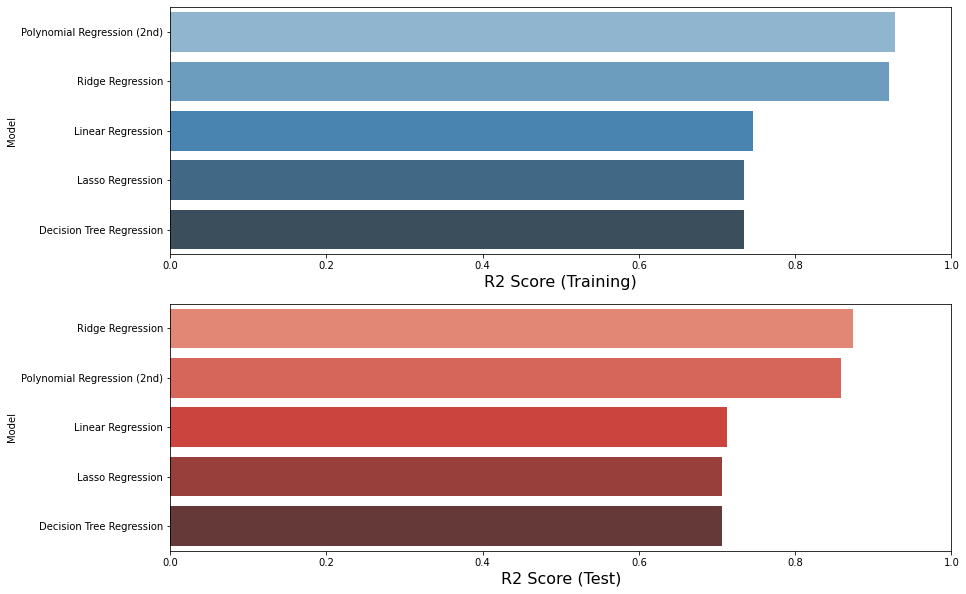

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

compare_predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = compare_predict, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

compare_predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = compare_predict, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

# Data Plots: Cross Validation

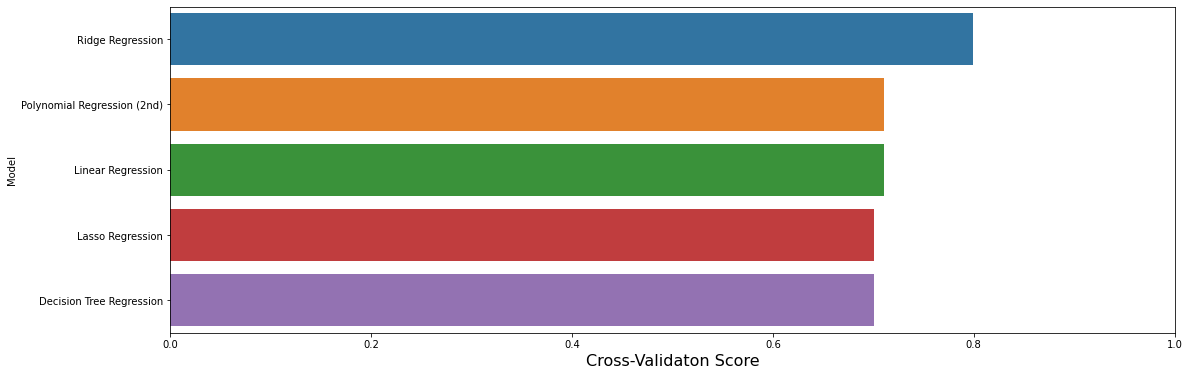

In [ ]:
f, axe = plt.subplots(1,1, figsize=(18,6))

compare_predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)
sns.barplot(x='Cross-Validation', y='Model', data = compare_predict, ax = axe)
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

# Data Plot: RMSE

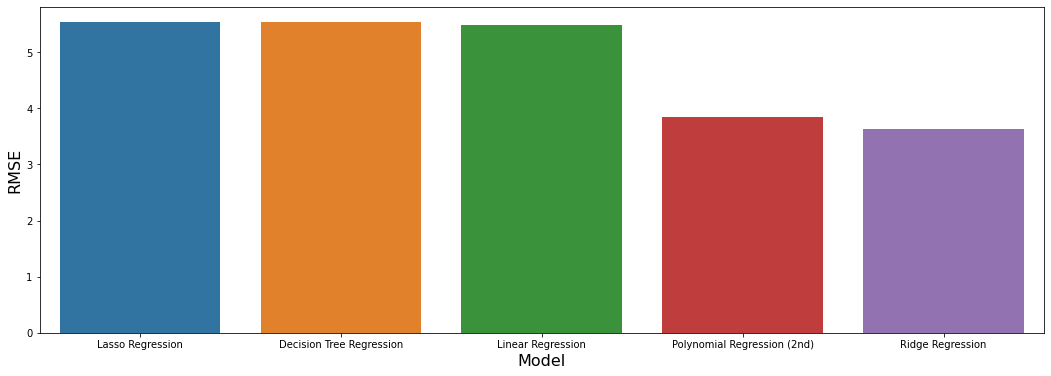

In [ ]:
compare_predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=compare_predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()